# Part II - (Prosper Loan- Explanatory Analysis)

## by (Quadri Omotesho)


## Investigation Overview


> In this investigation, I will like to examine the features of the datasets that affect significantly affects the Borrower's Interest rate. I will also like to compare the influence of these features on the original loan amount given to borrowers. Some relationships that I will be exploring include: BorrowerRate Vs ProsperRating, Loan Original Amount Vs ProsperRating, and then a combination of the three variables.

## Dataset Overview

> The data set is named Prosper Loan Data. There are 113937 rows and 81 columns in the dataset. It is a datasets showing information about the borrowers and lenders of loan.
> For my analysis, I created a subset of the data set as I was interested in some columns in the data set. This new subset(loan_subs) has 84853 rows and 11 columns.
> The columns that make this subset are;
    numeric variables = BorrowerRate, LoanOriginalAmount, DebtToIncomeRatio
    cat_var = LoanStatus, Income_range, EmploymentStatus, Terms, ProsperRating, IsBorrowerHomeowner,ListingCategory

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_sub = pd.read_csv('Prosper_subset.csv')
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           84853 non-null  int64  
 1   LoanStatus           84853 non-null  object 
 2   BorrowerRate         84853 non-null  float64
 3   EmploymentStatus     84853 non-null  object 
 4   DebtToIncomeRatio    84853 non-null  float64
 5   LoanOriginalAmount   84853 non-null  int64  
 6   IsBorrowerHomeowner  84853 non-null  bool   
 7   ProsperRating        84853 non-null  object 
 8   ListingCategory      84853 non-null  object 
 9   Income_range         84853 non-null  object 
 10  Terms                84853 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 6.6+ MB


In [3]:
P_rating = ['AA','A','B','C','D','E','HR']
P_ordinal = pd.api.types.CategoricalDtype(ordered = True, categories = P_rating)
loan_sub['ProsperRating'] = loan_sub['ProsperRating'].astype(P_ordinal)

In [4]:
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0           84853 non-null  int64   
 1   LoanStatus           84853 non-null  object  
 2   BorrowerRate         84853 non-null  float64 
 3   EmploymentStatus     84853 non-null  object  
 4   DebtToIncomeRatio    84853 non-null  float64 
 5   LoanOriginalAmount   84853 non-null  int64   
 6   IsBorrowerHomeowner  84853 non-null  bool    
 7   ProsperRating        84853 non-null  category
 8   ListingCategory      84853 non-null  object  
 9   Income_range         84853 non-null  object  
 10  Terms                84853 non-null  object  
dtypes: bool(1), category(1), float64(2), int64(2), object(5)
memory usage: 6.0+ MB


## (Borrower Interest Rate Disribution)

> A histogram plot showing the distribution of the Borrower's interest rate. This gives an indication of the interest rate that is most common among the loans given out. From the plot, we can observe that most loans have an  interest rate between 30-35%. We can also appreciate that there is barely any interest rate greater than 35%

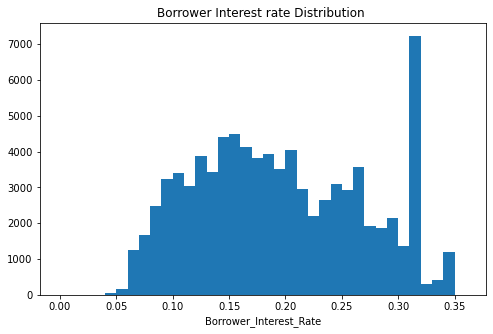

In [5]:
binsize = 0.01
bins = np.arange(0, loan_sub['BorrowerRate'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])

plt.hist(data = loan_sub, x = 'BorrowerRate', bins = bins);
plt.xlabel('Borrower_Interest_Rate')
plt.title('Borrower Interest rate Distribution ')
plt.show();

## (Original Loan Amount Distribution)

> The Original Loan amount is the amount of loan first colleceted by the borrower.
* From the loan Amount Distribution Plot, we can see that the most popular amounts are 4,000, 10,000 and 15,000 dollars. The upper limit is 35,000 dollars while the lower limit is 1,000 dollars. The most given out loan amount is 4,000 dollars. The log transformation of the scale was done to improve visuals.

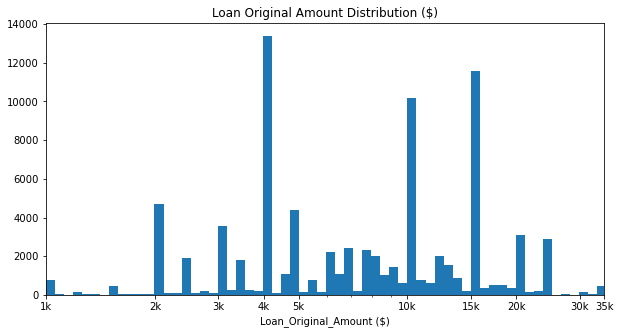

In [6]:
plt.figure(figsize =[10,5])
log_binsize = 0.025
bins_log = 10 ** np.arange(3, np.log10(loan_sub['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data = loan_sub, x = 'LoanOriginalAmount', bins = bins_log)
plt.xscale('log')
x_ticks = [1000, 2000, 3000, 4000, 5000, 10000, 15000,20000, 30000, 35000]
x_ticks_names = ['1k','2k', '3k', '4k', '5k', '10k','15k', '20k','30k','35k']
plt.xticks(x_ticks, x_ticks_names)
plt.xlim((1000,35000))
plt.xlabel('Loan_Original_Amount ($)')
plt.title('Loan Original Amount Distribution ($)');

## (Prosper Rating Distribution)
> The Prosper Rating is assigned at the time the listing was created between AA-HR  with AA being the highest and HR being the lowest. 
* From the plot of the Prosper Rating Distribution,  we can observe that most loans were given to the individual with ratings of D and above as expected. The prosper rating could be a major determinant if a person will get a loan and it could also predict interest rate.


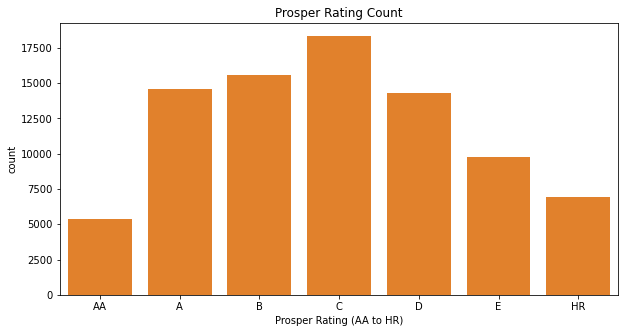

In [11]:
base_color = sb.color_palette()[1]
plt.figure(figsize = [10,5])
sb.countplot(data = loan_sub, x = 'ProsperRating', color =base_color)
plt.xlabel('Prosper Rating (AA to HR)')
plt.title('Prosper Rating Count');

## (Prosper Rating Vs Borrower Rate) and (Prosper Rating Vs Original Loan Amount)
>From the plot above, we can see that the Prosper Rating is a good predictor of the Borrower Interest rate and the initial loan amount given. 
* It is obvious that borrowers with high prosper rating (AA) have a good loan history and thus receive lower interest rate.They are also qualified for higher amount of loan. 
* Individuals with lower prosper rating (HR) do not have such history, hence higher interest rate and low loan amount.

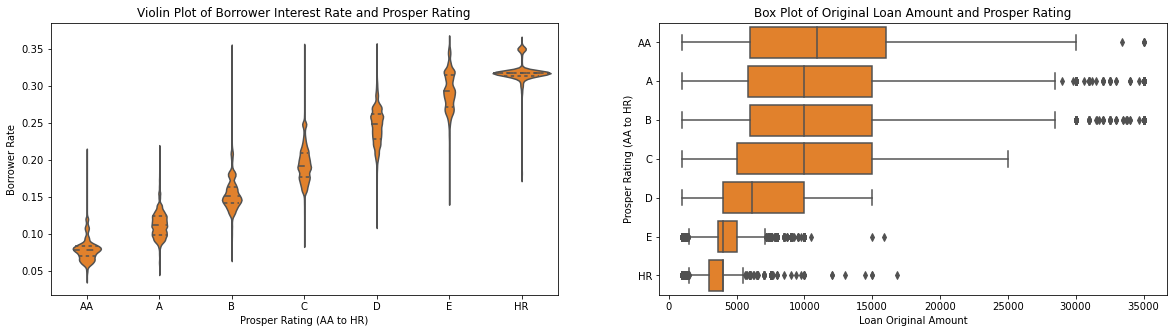

In [14]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sb.violinplot(data=loan_sub, x='ProsperRating', y='BorrowerRate', color= base_color, inner= 'quartile' )
plt.ylabel('Borrower Rate')
plt.xlabel('Prosper Rating (AA to HR)')
plt.title('Violin Plot of Borrower Interest Rate and Prosper Rating')

plt.subplot(1,2,2)
sb.boxplot(data=loan_sub, y='ProsperRating', x='LoanOriginalAmount', color= base_color)
plt.ylabel('Prosper Rating (AA to HR)')
plt.xlabel('Loan Original Amount')
plt.title('Box Plot of Original Loan Amount and Prosper Rating');

## Prosper Rating Vs Borrower Rate Vs Original Loan Amount
> We can see from the plot above the fall in borrower interest rate as the prospect rating increases from HR to AA
* We can also observe the reducing length of the line which represents a reducing original loan amount as the prospect rating decreases from AA to HR

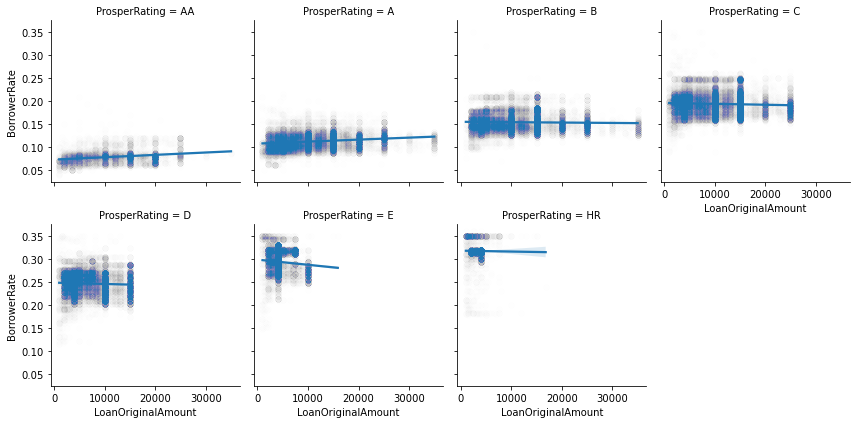

In [9]:
g = sb.FacetGrid(data = loan_sub, col = 'ProsperRating', col_wrap = 4)
g.map(sb.regplot,'LoanOriginalAmount', 'BorrowerRate', x_jitter = 0.05, scatter_kws = {'alpha': 0.005});

In [15]:
!jupyter nbconvert Part_two_slide_deck_Quadri.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_two_slide_deck_Quadri.ipynb to slides
[NbConvertApp] Writing 781184 bytes to Part_two_slide_deck_Quadri.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\omote\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\omote\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\omote\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\omote\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\omote\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_fi